In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

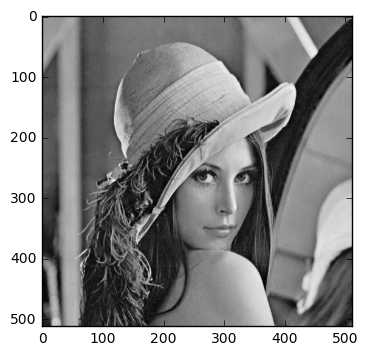

In [2]:
x=np.array(Image.open("lena.png").convert("L"))
plt.imshow(x,plt.cm.gray)
plt.show()
x=x/255.0

In [3]:
xder=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
[m,n]=x.shape
newimagex=np.zeros([m,n])
for i in range(1,m-2):
    for j in range(1,n-2):
        newimagex[i,j]=np.sum( xder[0:3,0:3]*x[i-1:i+2,j-1:j+2])

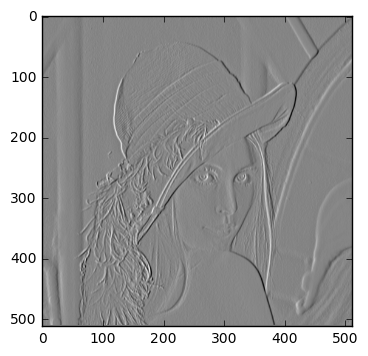

In [4]:
plt.imshow(newimagex,plt.cm.gray)
plt.show()

In [5]:
yder=xder.T
[m,n]=x.shape
newimagey=np.zeros([m,n])
for i in range(1,m-2):
    for j in range(1,n-2):
        newimagey[i,j]=np.sum( yder[0:3,0:3]*x[i-1:i+2,j-1:j+2])
        
        


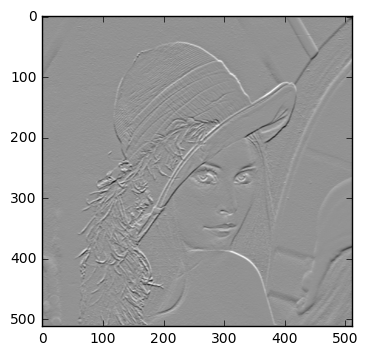

In [6]:
plt.imshow(newimagey,plt.cm.gray)
plt.show()

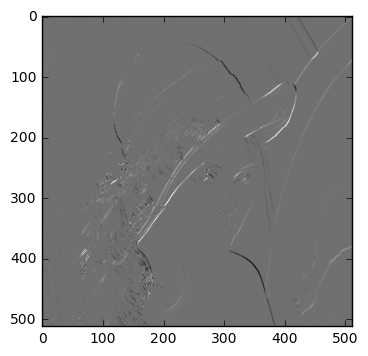

In [7]:
new_image=np.multiply(newimagey,newimagex)
plt.imshow(new_image,plt.cm.gray)
plt.show()

In [8]:
p=2
h=np.arange(-p,p+1)
[XX,YY]=np.meshgrid(h,h)
sigma=1
gaussian=np.exp(-(XX**2+YY**2)/(2*sigma**2))
total=np.sum(gaussian)
gauss=gaussian/total
gauss

array([[ 0.0036957 ,  0.01004595,  0.02730772,  0.01004595,  0.0036957 ],
       [ 0.01004595,  0.07423007,  0.07423007,  0.07423007,  0.01004595],
       [ 0.02730772,  0.07423007,  0.20177824,  0.07423007,  0.02730772],
       [ 0.01004595,  0.07423007,  0.07423007,  0.07423007,  0.01004595],
       [ 0.0036957 ,  0.01004595,  0.02730772,  0.01004595,  0.0036957 ]])

In [9]:
Ix=np.zeros([m,n])
for i in range(2,m-2):
    for j in range(2,n-2):
        Ix[i,j]=np.sum( gauss[0:5,0:5]*(newimagex[i-2:i+3,j-2:j+3])**2)
        
        

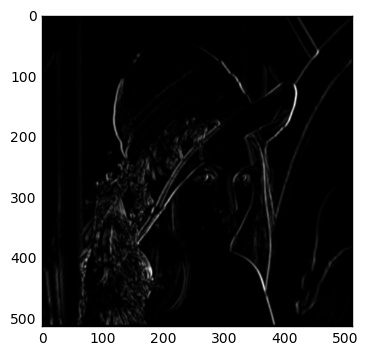

In [10]:
plt.imshow(Ix,plt.cm.gray)
plt.show()

In [11]:
Iy=np.zeros([m,n])
for i in range(2,m-2):
    for j in range(2,n-2):
        Iy[i,j]=np.sum( gauss[0:5,0:5]*(newimagey[i-2:i+3,j-2:j+3])**2)
        

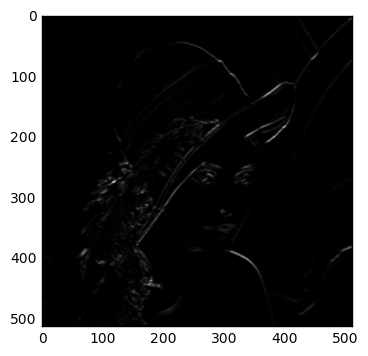

In [12]:
plt.imshow(Iy,plt.cm.gray)
plt.show()

In [13]:
Ixy=np.zeros([m,n])
for i in range(2,m-2):
    for j in range(2,n-2):
        Ixy[i,j]=np.sum( gauss[0:5,0:5]*np.multiply(newimagey[i-2:i+3,j-2:j+3],newimagex[i-2:i+3,j-2:j+3]))
        

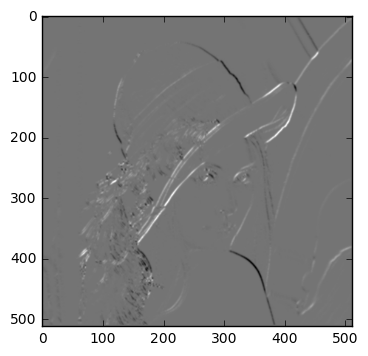

In [14]:
plt.imshow(Ixy,plt.cm.gray)
plt.show()

In [15]:
eps=np.finfo(float).eps
R=(Ix*Iy-Ixy**2)/(Ix+Iy+eps)



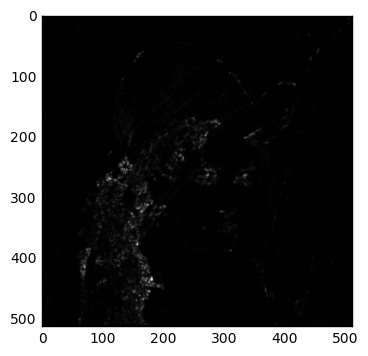

In [16]:
plt.imshow(R,plt.cm.gray)
plt.show()

In [17]:
radius=1
size=2*radius+1
newones=np.ones([size,size])
all_one=np.zeros([m,n])
for i in range(1,m-1):
    for j in range(1,n-1):
        s_value=np.ravel(R[i-1:i+2,j-1:j+2])
        s_value=np.sort(s_value)
        all_one[i,j]=s_value[8]
        
        


In [18]:
thresh=0.02
Rnew=(R==all_one) & (R>thresh)

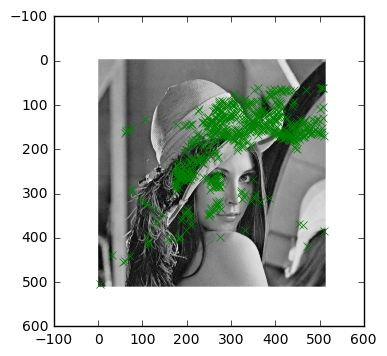

In [19]:
[r,c]=np.where(Rnew)
plt.imshow(x,plt.cm.gray)
plt.plot(r,c,'gx')
plt.show()